In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import skeleton_code
X_train, X_test, y_train, y_test = skeleton_code.main()

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


## 1. Feature normalization

### Feature normalization FOR HW

In [4]:
### Feature normalization 
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test - test set, a 2D numpy array of size (num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    #discard features that are constant in the training set
    feature_removal = np.std(train, axis=0) != 0
    train1 = train.transpose()
    train = train1[np.where(feature_removal)].transpose()
    
    test1 = test.transpose()
    test = test1[np.where(feature_removal)].transpose()
    
    #feature normalization
    MIN = np.amin(train,axis=0)
    MAX = np.amax(train,axis=0)
    train_normalized = (train - MIN)/(MAX - MIN)
    test_normalized = (test - MIN)/(MAX - MIN)
    return train_normalized, test_normalized
    # TODO

In [5]:
feature_normalization(train, test)

(array([[0.75, 1.  , 0.5 , 1.  , 1.  , 0.  , 0.75, 0.  ],
        [0.25, 0.5 , 0.  , 1.  , 0.  , 1.  , 0.25, 1.  ],
        [0.75, 0.  , 1.  , 0.5 , 1.  , 0.5 , 1.  , 1.  ],
        [0.  , 0.75, 1.  , 1.  , 0.  , 0.  , 0.75, 0.  ],
        [1.  , 0.75, 0.25, 0.  , 1.  , 0.75, 0.  , 1.  ]]),
 array([[1.  , 1.75, 1.75, 2.5 , 1.  , 1.25, 2.  , 2.  ],
        [1.25, 1.  , 1.75, 2.5 , 0.  , 0.  , 1.  , 0.  ],
        [0.  , 1.  , 2.25, 4.5 , 1.5 , 1.25, 1.75, 6.  ],
        [1.75, 2.  , 0.  , 3.5 , 2.5 , 1.  , 2.  , 7.  ],
        [2.25, 0.  , 0.5 , 1.  , 0.5 , 1.25, 0.75, 6.  ]]))

## 3.2 Gradient Descent

### 3.2.5 The square loss function

In [3]:
### The square loss function
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)

    Returns:
        loss - the average square loss, scalar
    """
    loss = 0 #Initialize the average square loss
    num_instances = X.shape[0]
    num_features =  X.shape[1]
    factor = np.matmul(X,theta) - y
    loss = 1/num_instances * np.matmul(factor.transpose(),factor).mean()
    
    return loss
    #TODO

In [40]:
X = np.array([[1,2,3,2],[1,4,3,5],[1,4,3,3]])
y = np.array([2,5,3])
theta = np.array([2,3,-4,2])
print(f'X:\n{X}\ny:{y}\ntheta:{theta}')

X:
[[1 2 3 2]
 [1 4 3 5]
 [1 4 3 3]]
y:[2 5 3]
theta:[ 2  3 -4  2]


In [39]:
X[:,2]

array([3, 3, 3])

In [6]:
num_instances = X.shape[0]
num_features =  X.shape[1]
factor = np.matmul(X,theta) - y
loss = 1/num_instances * np.matmul(factor.transpose(),factor)

In [8]:
compute_square_loss(X, y, theta)

26.0

### 3.2.6 The gradient of the square loss function

In [126]:
### The gradient of the square loss function
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss (as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    num_instances, num_features = X.shape[0], X.shape[1]

    factor = np.matmul(X,theta) - y
    grad = 2/num_instances *  np.matmul(X.transpose(), factor)
    
    return grad

In [9]:
compute_square_loss_gradient(X_train, y_train, theta)

NameError: name 'X' is not defined

### test

In [144]:
#1
grad = 2/num_instances * np.matmul(factor.transpose(),(X[:,0].reshape(num_instances,1)))
for i in range(1,num_features):
    Xi = 2/num_instances * np.matmul(factor.transpose(),(X[:,i].reshape(num_instances,1)))
    grad = np.vstack((grad,Xi))
grad.ravel()

array([ 6.66666667, 29.33333333, 20.        , 30.66666667])

In [147]:
#2
grad = np.zeros(shape=(num_features,1))
for i in range(1,num_features):
    Xi = 2/num_instances * np.matmul(factor.transpose(),(X[:,i].reshape(num_instances,1)))
    grad[i] = Xi
grad

array([[ 0.        ],
       [29.33333333],
       [20.        ],
       [30.66666667]])

# 3.3 grad checker

In [222]:
### Gradient checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm. Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
    (e_1 = (1,0,0,...,0), e_2 = (0,1,0,...,0), ..., e_d = (0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
    ( J(theta + epsilon * e_i) - J(theta - epsilon * e_i) ) / (2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    true_gradient = skeleton_code.compute_square_loss_gradient(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    #TODO
    grad_checker = True
    for i in range(num_features):
        e_i = np.zeros(num_features)
        e_i[i] = 1
        J1 = skeleton_code.compute_square_loss(X, y, theta+epsilon*e_i)
        J2 = skeleton_code.compute_square_loss(X, y, theta-epsilon*e_i)
        approx_grad[i] = (J1 - J2)/(2*epsilon)
    if np.linalg.norm(approx_grad - true_gradient) > tolerance:
        grad_checker == False
    return grad_checker

In [223]:
grad_checker(X_train, y_train, theta, epsilon=0.01, tolerance=1e-4)

True

# 3.4 Batch gradient descent

In [70]:
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array, (num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    theta = np.zeros(num_features) #Initialize theta
    
    #TODO
    loss_hist[0] = compute_square_loss(X, y, theta) # initial loss
    theta_hist[0] = theta # initial theta
    for i in range(num_step):
        grad = compute_square_loss_gradient(X, y, theta)
        theta = theta - alpha * grad
        theta_hist[i + 1] = theta
        loss = compute_square_loss(X, y, theta)
        loss_hist[i + 1] = loss
    return theta_hist, loss_hist

In [1]:
import skeleton_code

In [2]:
X_train, X_test, y_train, y_test = skeleton_code.main()

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


In [90]:
theta_hist, loss_hist = batch_grad_descent(X_train, y_train, alpha=0.1, num_step=1000, grad_check=False)

### 3.4.2 

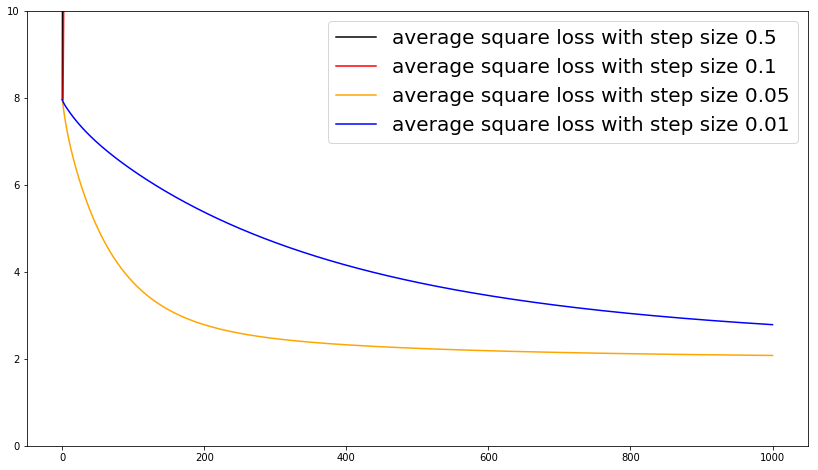

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.gcf()
fig.set_size_inches(14, 8)
number_steps = [i for i in range(1001)]
theta_hist1, loss_hist1 = skeleton_code.batch_grad_descent(X_train, y_train, alpha=0.5, num_step=1000, grad_check=False)
theta_hist2, loss_hist2 = skeleton_code.batch_grad_descent(X_train, y_train, alpha=0.1, num_step=1000, grad_check=False)
theta_hist3, loss_hist3 = skeleton_code.batch_grad_descent(X_train, y_train, alpha=0.05, num_step=1000, grad_check=False)
theta_hist4, loss_hist4 = skeleton_code.batch_grad_descent(X_train, y_train, alpha=0.01, num_step=1000, grad_check=False)
plt.plot(number_steps, loss_hist1, color = 'black', label = 'average square loss with step size 0.5')
plt.plot(number_steps, loss_hist2, color = 'red', label = 'average square loss with step size 0.1')
plt.plot(number_steps, loss_hist3, color = 'orange', label = 'average square loss with step size 0.05')
plt.plot(number_steps, loss_hist4, color = 'blue', label = 'average square loss with step size 0.01')
plt.legend(prop={ 'size':20})
plt.ylim(0,10)
# plt.xlim(0,10)
plt.show()

## 3.4.3 backtracking line search

In [253]:
### Backtracking line search
#Check http://en.wikipedia.org/wiki/Backtracking_line_search for details
#TODO
def batch_grad_descent_backtracking(X, y, step=1, alpha=0.25, beta = 0.8,num_step=1000, grad_check=False):
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    theta = np.zeros(num_features) #Initialize theta
    
    #TODO
    loss_hist[0] = skeleton_code.compute_square_loss(X, y, theta) # initial loss
    theta_hist[0] = theta # initial theta
    for i in range(num_step):
        grad = skeleton_code.compute_square_loss_gradient(X, y, theta)
        left = skeleton_code.compute_square_loss(X,y,(theta-step*grad)) 
        right = skeleton_code.compute_square_loss(X,y, theta) - alpha*step*(np.linalg.norm(grad)**2)
        if left > right:
            step = beta * step
        theta = theta - step * grad
        theta_hist[i + 1] = theta
        loss = skeleton_code.compute_square_loss(X, y, theta)
        loss_hist[i + 1] = loss
    return theta_hist, loss_hist

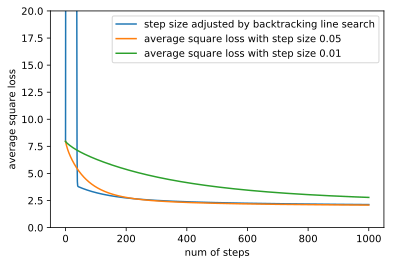

In [254]:
_,loss_hist1 = batch_grad_descent_backtracking(X_train, y_train, step=1, alpha=0.25, beta = 0.8,num_step=1000, grad_check=False)
plt.plot(loss_hist1, label = 'step size adjusted by backtracking line search')
theta_hist3, loss_hist3 = skeleton_code.batch_grad_descent(X_train, y_train, alpha=0.05, num_step=1000, grad_check=False)
theta_hist4, loss_hist4 = skeleton_code.batch_grad_descent(X_train, y_train, alpha=0.01, num_step=1000, grad_check=False)
plt.plot(loss_hist3, label = 'average square loss with step size 0.05')
plt.plot(loss_hist4, label = 'average square loss with step size 0.01')
plt.ylim(0,20)
plt.ylabel('average square loss')
plt.xlabel('num of steps')
plt.legend()
# plt.savefig('343.png')
plt.show()

In [3]:
%timeit skeleton_code.batch_grad_descent_backtracking(X_train, y_train, step=1, alpha=0.25, beta = 0.8,num_step=1000, grad_check=False)

47.2 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
%timeit skeleton_code.batch_grad_descent(X_train, y_train, alpha=0.05, num_step=1000, grad_check=False)

18.4 ms ± 751 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 3.5.2 regularized_square_loss_gradient

In [ ]:
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    #TODO
    num_instances, num_features =  X.shape[0],X.shape[1]
    factor = np.matmul(X,theta) - y
    grad = 2/num_instances *X.transpose() * factor + 2 * lambda_reg * theta
    return grad

## 3.5.7

In [6]:
# def backtrack(X, y, step=1,alpha = 0.8,num_step=1000,it = 0): 
#     num_instances, num_features = X.shape[0], X.shape[1]
#     theta = np.zeros(num_features)
#     grad = skeleton_code.compute_square_loss_gradient(X, y, theta)
#     step = 1.0
#     loss1 = skeleton_code.compute_square_loss(X - step * grad, y, theta)
#     loss2 = skeleton_code.compute_square_loss(X, y, theta)
    
#     while loss1 > (loss2 - 0.1 * step * (np.linalg.norm(grad))**2) and it < num_step:
#         it+=1
#         step = alpha * step        
#         theta = theta - step * grad
#         grad = skeleton_code.compute_square_loss_gradient(X, y, theta)
        
#         loss1 = skeleton_code.compute_square_loss(X - step * grad, y, theta)
#         loss2 = skeleton_code.compute_square_loss(X, y, theta)
        
#     return step

/Users/jr/Desktop/1003 ML/hw/hw1/hw1/skeleton_code.py:228: RuntimeWarning: overflow encountered in double_scalars
  loss = compute_square_loss(X, y, theta) + lambda_reg * np.matmul(theta.transpose(), theta)
/Users/jr/Desktop/1003 ML/hw/hw1/hw1/skeleton_code.py:197: RuntimeWarning: overflow encountered in multiply
  grad = 2/num_instances * np.matmul(X.transpose(), factor) + 2 * lambda_reg * theta


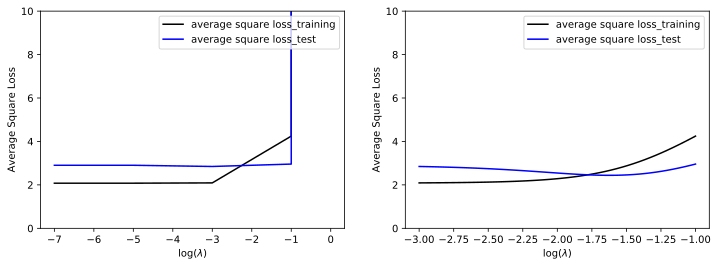

In [217]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
fig = plt.gcf()
fig.set_size_inches(12, 4)
def loss_lambda(lambda_list):
    loss_train_list = []
    loss_test_list = []
    for lambda_reg in lambda_list:
        lambda_reg = 10**(lambda_reg)
        theta_hist1, loss_hist1 = skeleton_code.regularized_grad_descent(X_train,y_train,0.05,lambda_reg,1000)
        theta = theta_hist1[-1]
        loss_train = skeleton_code.compute_square_loss(X_train, y_train, theta) 
        loss_train_list.append(loss_train)
        loss_test = skeleton_code.compute_square_loss(X_test, y_test, theta) 
        loss_test_list.append(loss_test)
    plt.plot(lambda_list,loss_train_list,color = 'black', label = 'average square loss_training')
    plt.plot(lambda_list,loss_test_list,color = 'blue', label = 'average square loss_test')
 
plt.subplot(1,2,1)
lambda_list = [-7,-5,-3,-1,0,1,2]
loss_lambda(lambda_list)
plt.legend()
plt.ylim(0,10)
plt.xlabel('log($\lambda$)')
plt.ylabel('Average Square Loss')

plt.subplot(1,2,2)
lambda_list = np.linspace(-3,-1,num = 50)
loss_lambda(lambda_list)
plt.legend()
plt.ylim(0,10)
plt.xlabel('log($\lambda$)')
plt.ylabel('Average Square Loss')
plt.savefig('357.png')
plt.show()

## 3.6.4 Stochastic gradient descent

In [33]:
# 3.6.4 & 3.6.5
def stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=10**-2, num_epoch=1000,C=0.1):
    """
    In this question you will implement stochastic gradient descent with regularization term

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
                t = num steps = (num epochs) x (num instances)
        lambda_reg - the regularization coefficient
        num_epoch - number of epochs to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch (num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size (num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    #TODO
    loss_hist[0] = skeleton_code.compute_square_loss(X, y, theta_hist[0][0]) #initial loss
    
    t = 0
    for i in range(num_epoch):
        #shuffle data
        idx = np.arange(num_instances)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx] 
        for j in range(num_instances):
            t = t+1
            if alpha =='1/sqrt(t)':
                step_size = C/(t**(1/2))
            elif alpha == '1/t':
                step_size = C/t
            else:
                step_size = alpha
            factor = np.matmul(X[j],theta) -  y[j]  #h(xi) - y(i)
            theta = theta - 2 * step_size * (factor * X[j].transpose() + lambda_reg * theta)
            theta_hist[i][j] = theta   
            loss_hist[i][j] = skeleton_code.compute_square_loss(X,y,theta) + lambda_reg * np.matmul(theta.transpose(), theta)
            
    return theta_hist, loss_hist

/Users/jr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in multiply


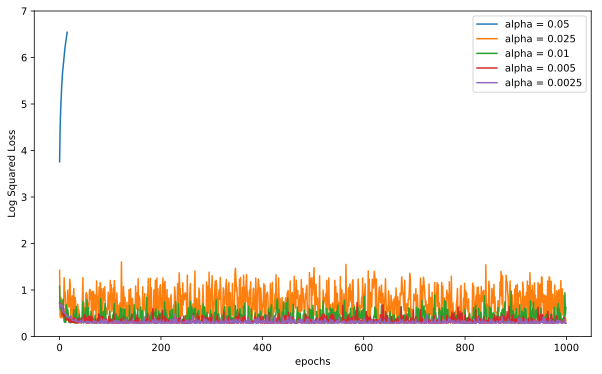

In [35]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(10,6))
def loss_figure(loss_hist,label):
    loss = []
    for i in range(loss_hist.shape[0]):
        loss.append(np.log(loss_hist[i][-1]))
    plt.plot(np.log(loss),label = label)

_,loss_hist = stochastic_grad_descent(X_train, y_train, alpha=0.05, lambda_reg=10**-1.6, num_epoch=1000,C = 0.1)
loss_figure(loss_hist,'alpha = 0.05')
_,loss_hist = stochastic_grad_descent(X_train, y_train, alpha=0.025, lambda_reg=10**-1.6, num_epoch=1000,C = 0.1)
loss_figure(loss_hist,'alpha = 0.025')
_,loss_hist = stochastic_grad_descent(X_train, y_train, alpha=0.01, lambda_reg=10**-1.6, num_epoch=1000,C = 0.1)
loss_figure(loss_hist,'alpha = 0.01')
_,loss_hist = stochastic_grad_descent(X_train, y_train, alpha=0.005, lambda_reg=10**-1.6, num_epoch=1000,C = 0.1)
loss_figure(loss_hist,'alpha = 0.005')
_,loss_hist = stochastic_grad_descent(X_train, y_train, alpha=0.0025, lambda_reg=10**-1.6, num_epoch=1000,C = 0.1)
loss_figure(loss_hist,'alpha = 0.0025')
plt.ylim(0,7)
plt.legend()
plt.ylabel('Log Squared Loss')
plt.xlabel('epochs')
plt.savefig('3651.png')
plt.show()

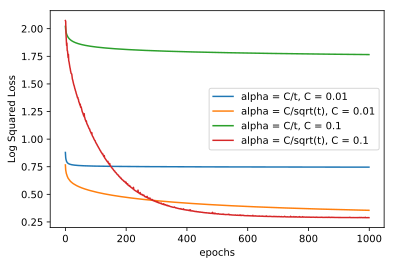

In [37]:
_,loss_hist = stochastic_grad_descent(X_train, y_train, alpha='1/t', lambda_reg=10**-1.6, num_epoch=1000,C = 0.01)
loss_figure(loss_hist,'alpha = C/t, C = 0.01')
_,loss_hist = stochastic_grad_descent(X_train, y_train, alpha='1/sqrt(t)', lambda_reg=10**-1.6, num_epoch=1000,C = 0.01)
loss_figure(loss_hist,'alpha = C/sqrt(t), C = 0.01')
_,loss_hist = stochastic_grad_descent(X_train, y_train, alpha='1/t', lambda_reg=10**-1.6, num_epoch=1000,C = 0.1)
loss_figure(loss_hist,'alpha = C/t, C = 0.1')
_,loss_hist = stochastic_grad_descent(X_train, y_train, alpha='1/sqrt(t)', lambda_reg=10**-1.6, num_epoch=1000,C = 0.1)
loss_figure(loss_hist,'alpha = C/sqrt(t), C = 0.1')
plt.legend()
plt.ylabel('Log Squared Loss')
plt.xlabel('epochs')
plt.savefig('3652.png')
plt.show()

In [21]:
# a new stepsize rule 
def stochastic_grad_descent_newrule(X, y, step, lambda_reg=10**-2, num_epoch=1000):
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta
    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    #TODO  
    loss_hist[0] = skeleton_code.compute_square_loss(X, y, theta_hist[0][0]) #initial loss
    t = 0  
    for i in range(num_epoch):
        idx = np.arange(num_instances)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        for j in range(len(X)):
            t = t+1
            factor = np.matmul(X[j],theta) -  y[j]  #h(xi) - y(i)
            theta = theta - 2 * step * (factor * X[j].transpose() + lambda_reg * theta)
            step = step/(1+ step*lambda_reg*t)
            theta_hist[i][j] = theta   
            loss_hist[i][j] = skeleton_code.compute_square_loss(X,y,theta) + lambda_reg * np.matmul(theta.transpose(), theta)
    return theta_hist, loss_hist

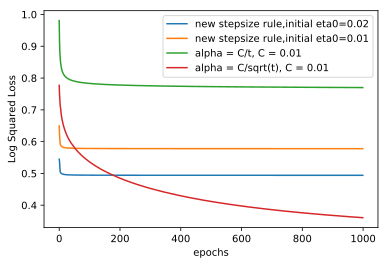

In [48]:
_,loss_hist = stochastic_grad_descent_newrule(X_train, y_train, step=0.02, lambda_reg=10**-1.6, num_epoch=1000)
loss_figure(loss_hist,'new stepsize rule,initial eta0=0.02')
_,loss_hist = stochastic_grad_descent_newrule(X_train, y_train, step=0.01, lambda_reg=10**-1.6, num_epoch=1000)
loss_figure(loss_hist,'new stepsize rule,initial eta0=0.01')
_,loss_hist = stochastic_grad_descent(X_train, y_train, alpha='1/t', lambda_reg=10**-1.6, num_epoch=1000,C = 0.01)
loss_figure(loss_hist,'alpha = C/t, C = 0.01')
_,loss_hist = stochastic_grad_descent(X_train, y_train, alpha='1/sqrt(t)', lambda_reg=10**-1.6, num_epoch=1000,C = 0.01)
loss_figure(loss_hist,'alpha = C/sqrt(t), C = 0.01')
# plt.ylim(0,90)
plt.legend()
plt.ylabel('Log Squared Loss')
plt.xlabel('epochs')
plt.savefig('366.png')
plt.show()